# 6.6 Time Series Analysis

## Index
1. Importing Libraries and data
2. Cleaning and wrangling data
3. Decomposition
4. Dickey-Fuller test (Stationarity Check)
5. Autocorrelation

## 1. Importing Libraries and Data

In [43]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable warnings

plt.style.use('fivethirtyeight') 



In [44]:
# Path to data folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 6\Data'

In [45]:
#path to gun violence time series data
gv = pd.read_csv(os.path.join(path, 'Prepared Data', 'Time series data.csv'))

In [46]:
gv.head()

,Date,Incidents per quarter
0,1/1/2014,11109
1,4/1/2014,12651
2,7/1/2014,15530
3,10/1/2014,12564
4,1/1/2015,11329


## 2. Cleaning and Wrangling data

In [47]:
gv.dtypes

Date                     object
Incidents per quarter     int64
dtype: object

In [48]:
gv.shape

(17, 2)

In [49]:
gv.columns

Index(['Date', 'Incidents per quarter'], dtype='object')

## I used Excel to count the individual incidents for the different quarters of the year and removed the individual incidents so that we have a quaterly number going back to 2013. I then removed the incidents from 2013 as the count of those where much smaller than the quarters going forward and I didnt want them to throw off the analysis

In [50]:
# Making a column for datetime and using it as index
from datetime import datetime
gv['datetime'] = pd.to_datetime(gv['Date']) # Create datetime column
gv = gv.set_index('datetime') # Set datetime as the index of the dataframe.
gv.drop(['Date'], axis=1, inplace=True) # Drop the date column.
gv.head()

,Incidents per quarter
datetime,
2014-01-01,11109
2014-04-01,12651
2014-07-01,15530
2014-10-01,12564
2015-01-01,11329


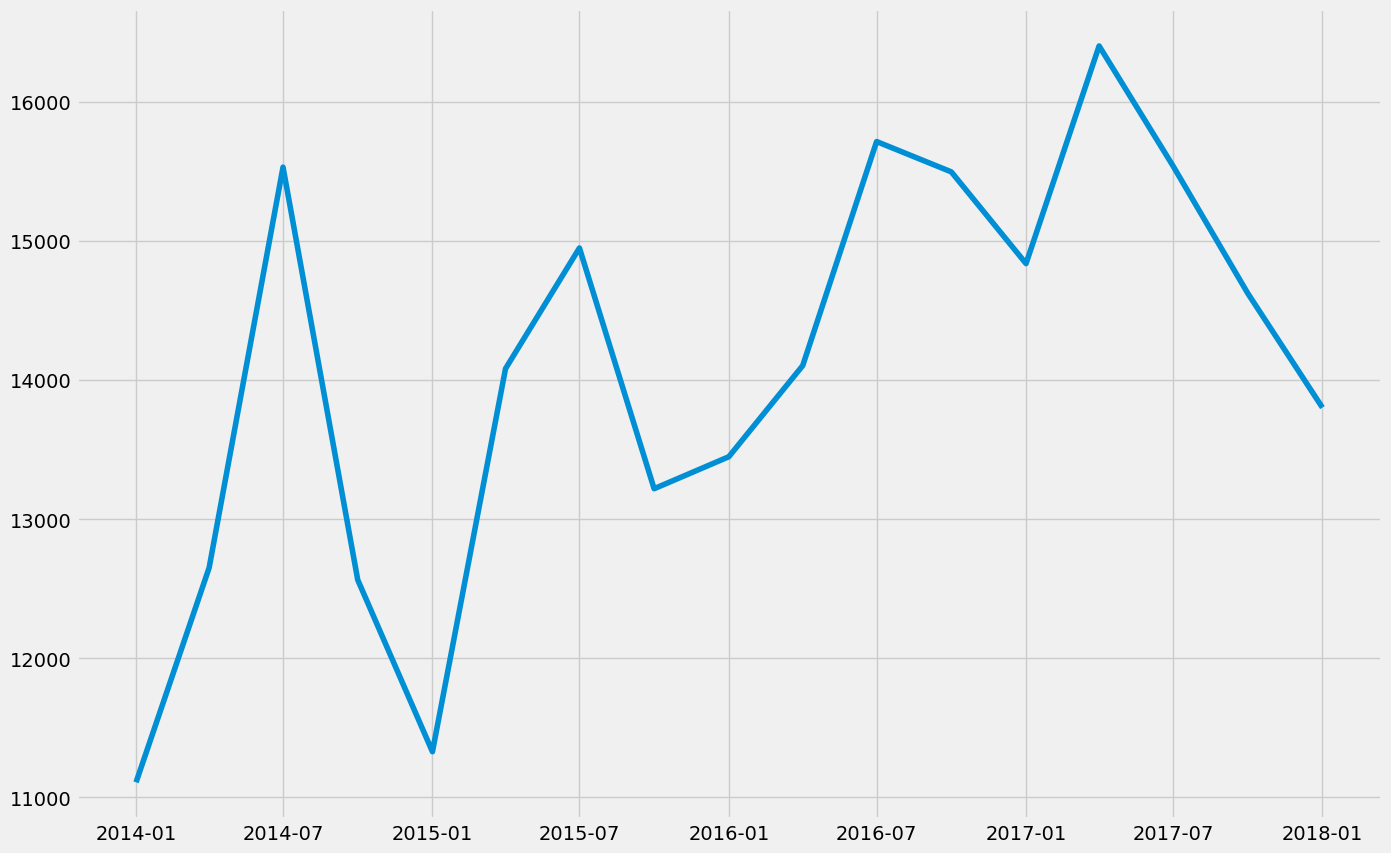

In [51]:
# Visual Check
plt.figure(figsize=(15,10), dpi=100)
plt.plot(gv)

## 3. Decomposition

In [52]:
# Decompose the time series using a multiplicative model
decomposition = sm.tsa.seasonal_decompose(gv, model='multiplicative')

In [53]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

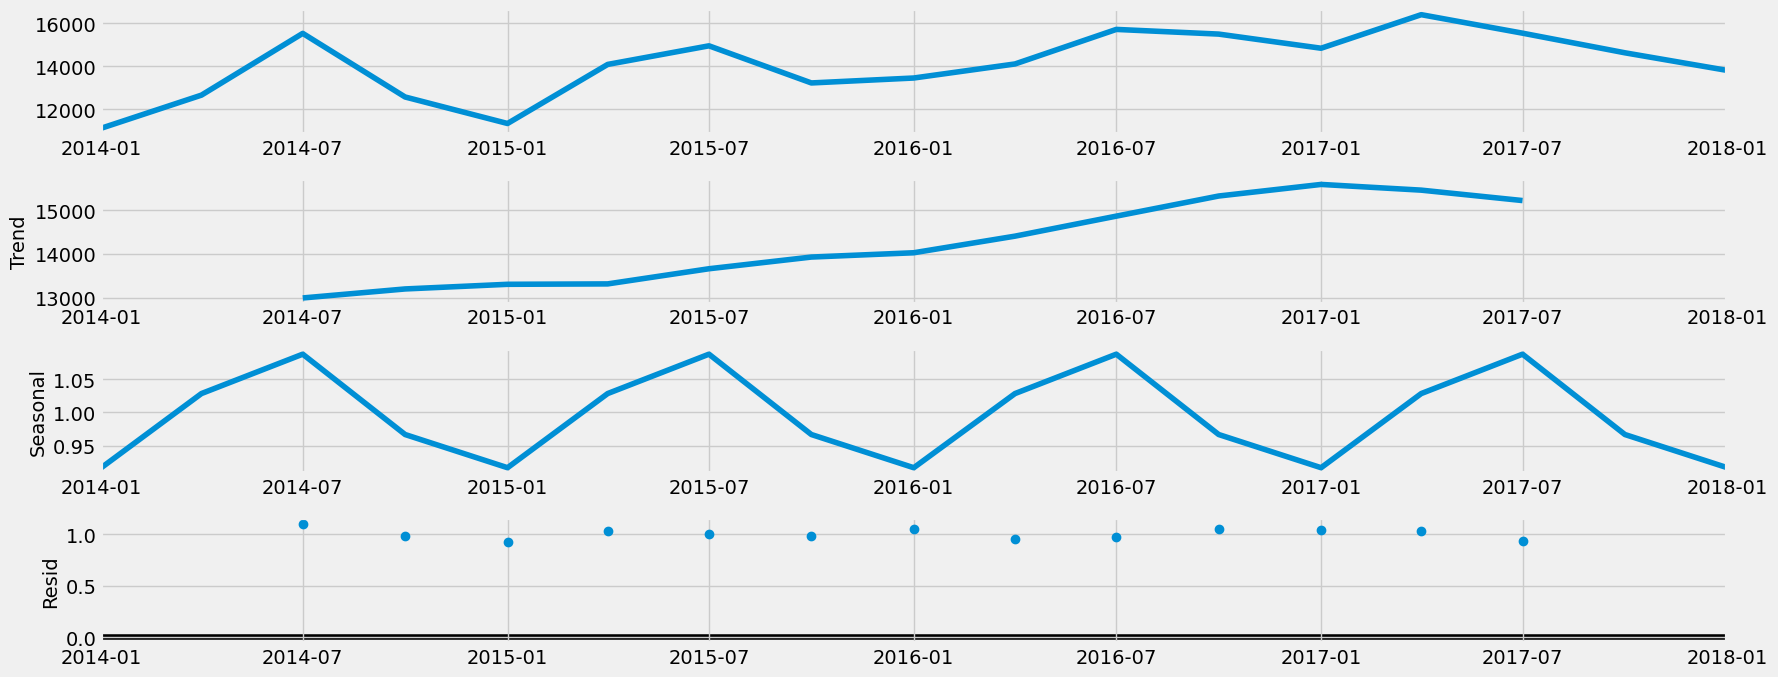

In [54]:
# Plotting the decomposition
decomposition.plot()
plt.show()

##
Trend - There is an upward trend in the number of gun violence incidents from year to year

Seasonality - It seems there is a pattern where there are more events dueing the summer months and less in the winter months

Noise - There also isn't much data that falls out of the pattern, i did however already remove the incidents for 2013 which would have changed the results of this. 

## 4. Dickey-Fuller Test (Stationarity Check)

In [55]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result) # Perform test


dickey_fuller(gv['Incidents per quarter']) # Apply the test

Dickey-Fuller Stationarity test:
Test Statistic                 -3.073543
p-value                         0.028574
Number of Lags Used             0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


## According to the Dickey-Fuller test we can reject our null hypothesis that there is not a unit root as the p-value is 0.028547 and is considered a significant result. Using a confidence level of 5% our test statistic of -3.073543 is smaller than the crictical value(5%) of -3.068498. This is telling me that the jumps in the data are constant and the data is stationary.

## 5. Autocorrelation

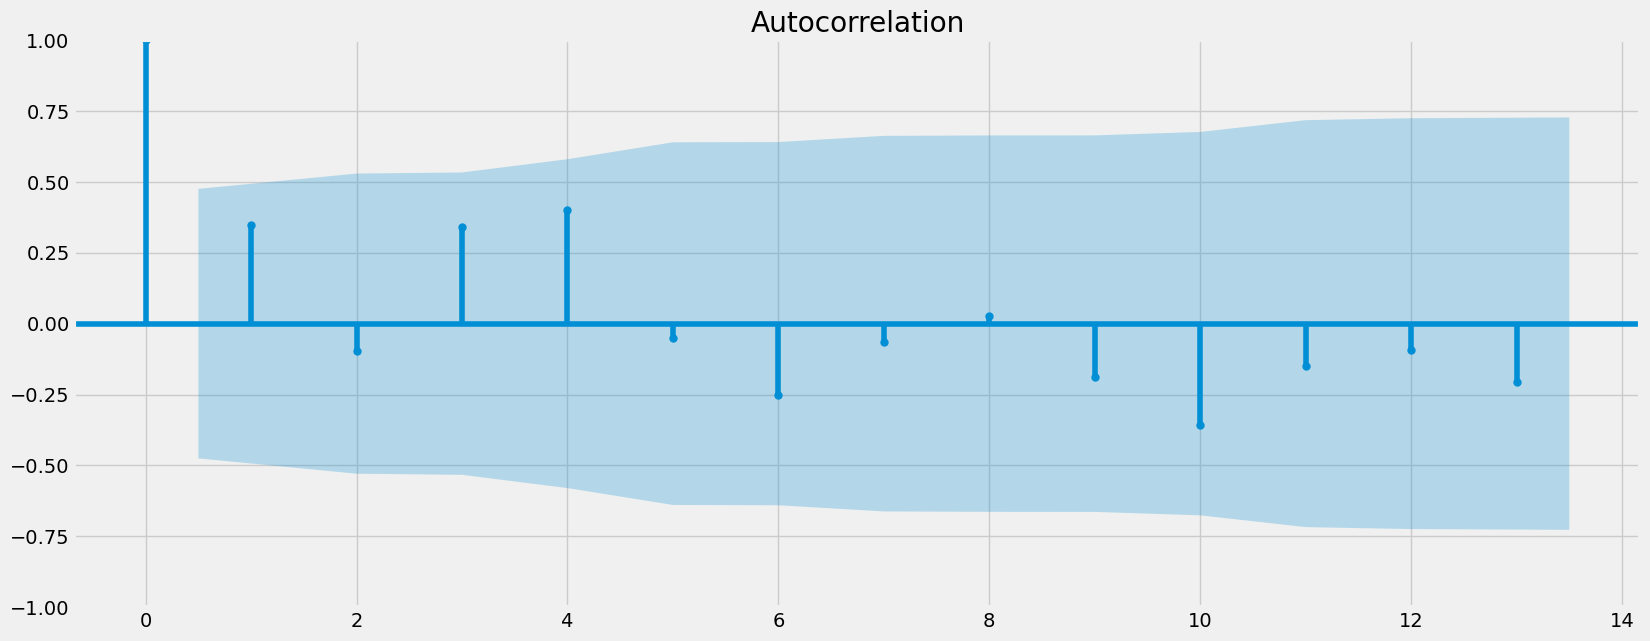

In [56]:
# AutoCorrelation Check
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(gv)
plt.show()